## Import Library

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors

## Data Preparation

In [449]:
# import dataset gms
games = pd.read_excel('dataset.xlsx', sheet_name='gms')

In [450]:
# import dataset amz
amz = pd.read_csv('amz.csv', delimiter=';')

In [451]:
games.isnull().sum()

Urutan         0
Nama           0
Platform       0
Tahun        271
Genre          0
Publisher     58
Amerika        0
Europe         0
Jepang         0
Other          0
Global         0
dtype: int64

In [452]:
games = games.dropna()
print('Jumlah missing value:')
games.isnull().sum()

Jumlah missing value:


Urutan       0
Nama         0
Platform     0
Tahun        0
Genre        0
Publisher    0
Amerika      0
Europe       0
Jepang       0
Other        0
Global       0
dtype: int64

In [453]:
# menghapus kolom urutan karena tidak dibutuhkan
games = games.drop('Urutan', axis=1)

In [454]:
# cek duplikat
duplikat_gms = games.duplicated().sum()
print(f'Jumlah duplikat : {duplikat_gms}')

Jumlah duplikat : 0


In [455]:
# menampilkan dataset
games.head()

,Nama,Platform,Tahun,Genre,Publisher,Amerika,Europe,Jepang,Other,Global
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [456]:
amz.isnull().sum()

Invoice              0
SKU                  0
Deskripsi         1454
Qty                  0
Invoice_Date         0
Price                0
Cust_ID         135080
Negara               0
dtype: int64

In [457]:
amz.duplicated().sum()

5268

In [458]:
amz = amz.drop_duplicates()

## Publisher mana saja yang memiliki penjualan terbesar?

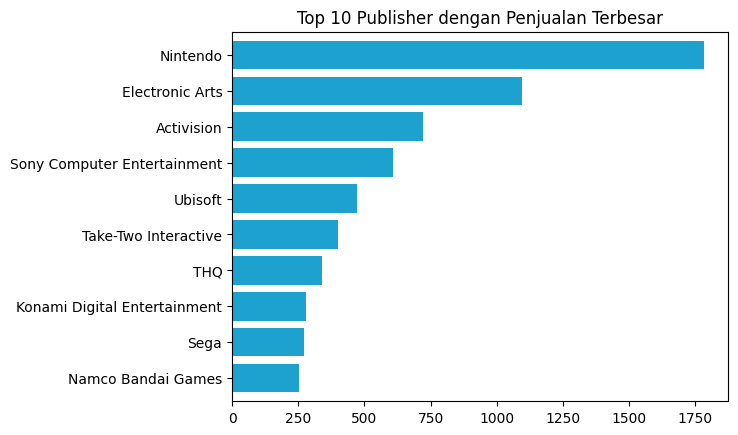

In [459]:
games.groupby('Publisher')['Global'].sum().sort_values().tail(10).plot(kind='barh', width=0.8, color='#1da2d0')
plt.ylabel('')
plt.title('Top 10 Publisher dengan Penjualan Terbesar');

### Apa yang perlu dilakukan untuk meningkatkan penjualan di Electronic Arts?

In [460]:
EA = games[games['Publisher']=='Electronic Arts']

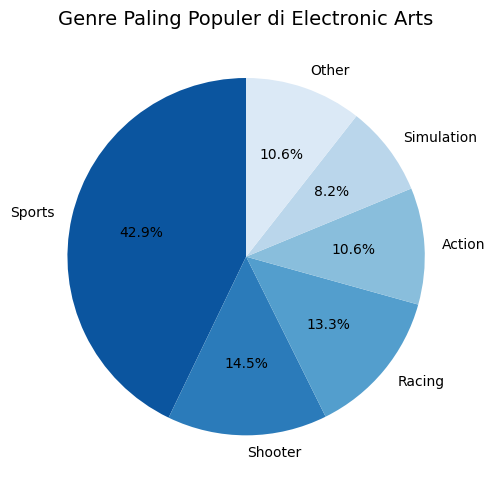

In [461]:
# Menghitung total penjualan per Genre untuk setiap wilayah
genre_sales = EA.groupby('Genre')[['Amerika', 'Europe', 'Jepang', 'Other']].sum()

# Menambahkan total global sales ke dalam dataframe
genre_sales['Global'] = genre_sales.sum(axis=1)

# Mengurutkan berdasarkan penjualan global secara menurun
genre_sales = genre_sales.sort_values(by='Global', ascending=False)

# Gabungkan kategori kecil ke dalam grup "Other"
threshold = 0.05 * genre_sales['Global'].sum()  # Nilai threshold 5% dari total penjualan
filtered_genre_sales = genre_sales['Global'][genre_sales['Global'] >= threshold]
other_sales = genre_sales['Global'][genre_sales['Global'] < threshold].sum()
filtered_genre_sales['Other'] = other_sales

# Membuat pie chart
plt.figure(figsize=(8, 5))
plt.pie(
    filtered_genre_sales,
    labels=filtered_genre_sales.index,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",
    startangle=90,
    colors=sns.color_palette('Blues')[::-1]
)
plt.title("Genre Paling Populer di Electronic Arts", fontsize=14)
plt.tight_layout()
plt.show()

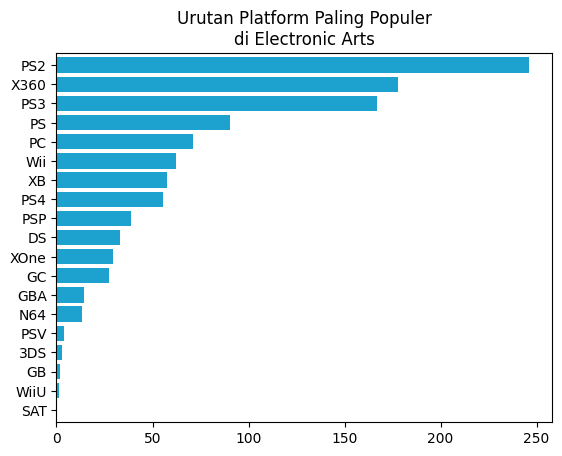

In [462]:
EA.groupby('Platform')['Global'].sum().sort_values().plot(kind='barh', width=0.8, color='#1da2d0')
plt.ylabel("")
plt.title('Urutan Platform Paling Populer\ndi Electronic Arts');

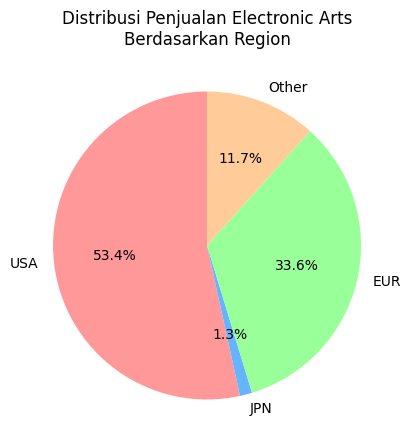

In [463]:
# Total nilai untuk masing-masing wilayah
Usa = EA['Amerika'].sum()
Jpn = EA['Jepang'].sum()
Eur = EA['Europe'].sum()
Oth = EA['Other'].sum()

# Membuat label dan data untuk pie chart
labels = ['USA', 'JPN', 'EUR', 'Other']
sizes = [Usa, Jpn, Eur, Oth]

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Penjualan Electronic Arts\nBerdasarkan Region')

# Menampilkan pie chart
plt.show()

### Apa yang perlu dilakukan untuk meningkatkan penjualan di Activision?

In [464]:
Act = games[games['Publisher']=='Activision']

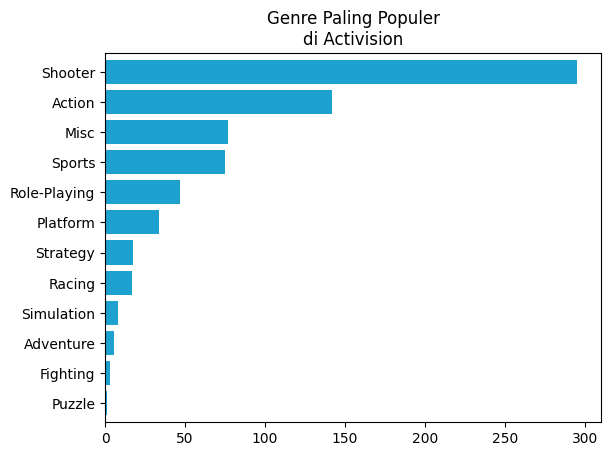

In [465]:
# Genre
Act.groupby('Genre')['Global'].sum().sort_values().plot(kind='barh', width=0.8, color='#1da2d0')
plt.ylabel('')
plt.title('Genre Paling Populer\ndi Activision');

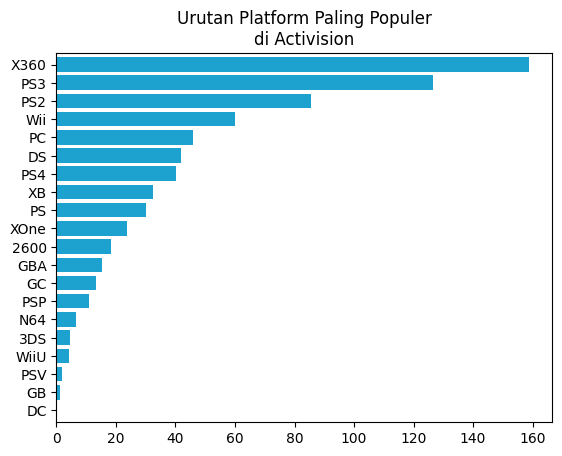

In [466]:
# Platform
Act.groupby('Platform')['Global'].sum().sort_values().plot(kind='barh', width=0.8, color='#1da2d0')
plt.ylabel("")
plt.title('Urutan Platform Paling Populer\ndi Activision');

In [467]:
UsaAct = Act['Amerika'].sum()
JpnAct = Act['Jepang'].sum()
EurAct = Act['Europe'].sum()
OthAct = Act['Other'].sum()

print(f"USA : {UsaAct:.2f}")
print(f"Jepang : {JpnAct:.2f}")
print(f"Eropa : {EurAct:.2f}")
print(f"Lainnya : {OthAct:.2f}")

USA : 426.01
Jepang : 6.54
Eropa : 213.72
Lainnya : 74.79


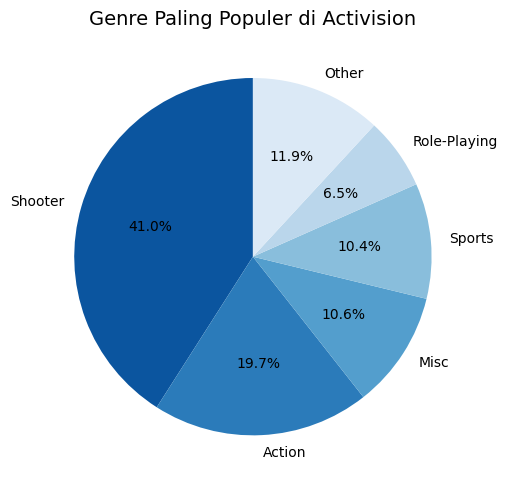

In [468]:
# Menghitung total penjualan per Genre untuk setiap wilayah
genre_sales = Act.groupby('Genre')[['Amerika', 'Europe', 'Jepang', 'Other']].sum()

# Menambahkan total global sales ke dalam dataframe
genre_sales['Global'] = genre_sales.sum(axis=1)

# Mengurutkan berdasarkan penjualan global secara menurun
genre_sales = genre_sales.sort_values(by='Global', ascending=False)

# Gabungkan kategori kecil ke dalam grup "Other"
threshold = 0.05 * genre_sales['Global'].sum()  # Nilai threshold 5% dari total penjualan
filtered_genre_sales = genre_sales['Global'][genre_sales['Global'] >= threshold]
other_sales = genre_sales['Global'][genre_sales['Global'] < threshold].sum()
filtered_genre_sales['Other'] = other_sales

# Membuat pie chart
plt.figure(figsize=(8, 5))
plt.pie(
    filtered_genre_sales,
    labels=filtered_genre_sales.index,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",
    startangle=90,
    colors=sns.color_palette('Blues')[::-1]
)
plt.title("Genre Paling Populer di Activision", fontsize=14)
plt.tight_layout()
plt.show()

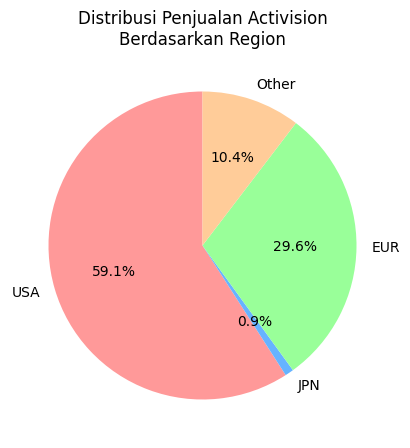

In [469]:
# Total nilai untuk masing-masing wilayah
Usa = Act['Amerika'].sum()
Jpn = Act['Jepang'].sum()
Eur = Act['Europe'].sum()
Oth = Act['Other'].sum()

# Membuat label dan data untuk pie chart
labels = ['USA', 'JPN', 'EUR', 'Other']
sizes = [Usa, Jpn, Eur, Oth]

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Penjualan Activision\nBerdasarkan Region')

# Menampilkan pie chart
plt.show()

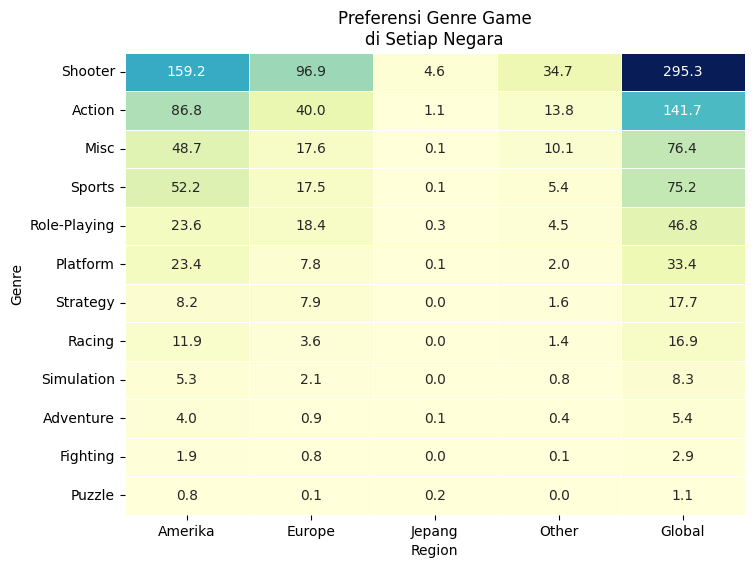

In [470]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    genre_sales,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar=False
)
plt.title('Preferensi Genre Game\ndi Setiap Negara')
plt.ylabel('Genre')
plt.xlabel('Region')
plt.xticks()
plt.show()

In [471]:
# Menghitung total penjualan per Platform untuk setiap wilayah
platform_sales = Act.groupby('Platform')[['Amerika', 'Europe', 'Jepang', 'Other']].sum()

# Menambahkan total global sales ke dalam dataframe
platform_sales['Global'] = platform_sales.sum(axis=1)

# Mengurutkan berdasarkan penjualan global secara menurun
platform_sales = platform_sales.sort_values(by='Global', ascending=False)

platform_sales = platform_sales.drop('Global', axis=1)

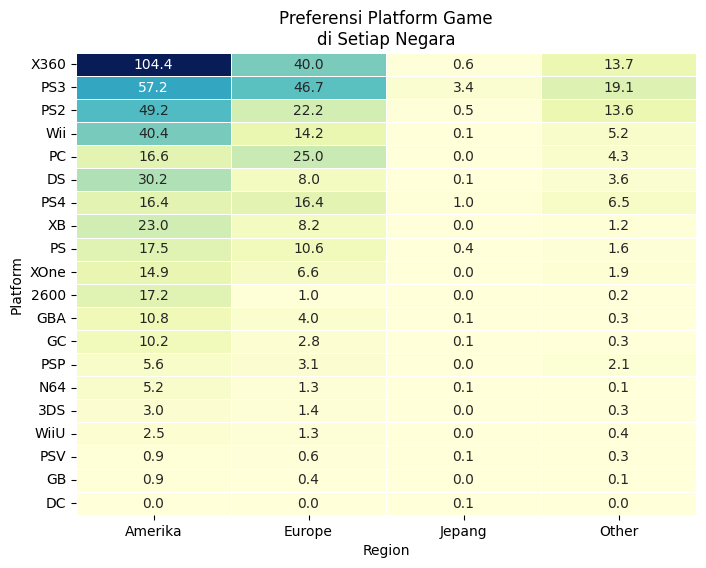

In [472]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    platform_sales,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar=False
)
plt.title('Preferensi Platform Game\ndi Setiap Negara')
plt.ylabel('Platform')
plt.xlabel('Region')
plt.xticks()
plt.show()

### Genre dan Publisher Apa yang Dapat dikembangkan Oleh Publisher Sega?

In [473]:
sega = games[games['Publisher']=='Sega']

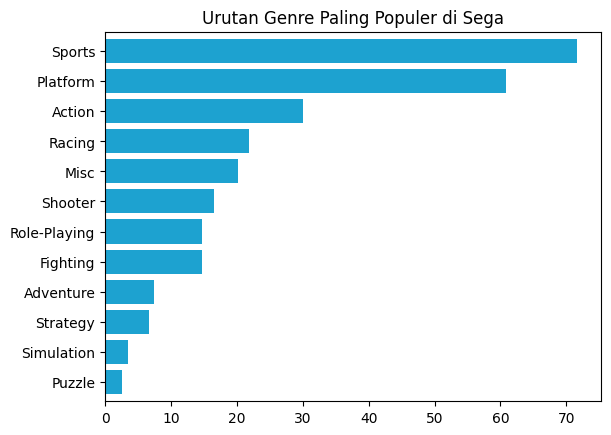

In [474]:
sega.groupby('Genre')['Global'].sum().sort_values().plot(kind='barh', width=0.8, color='#1da2d0')
plt.title('Urutan Genre Paling Populer di Sega')
plt.ylabel('');

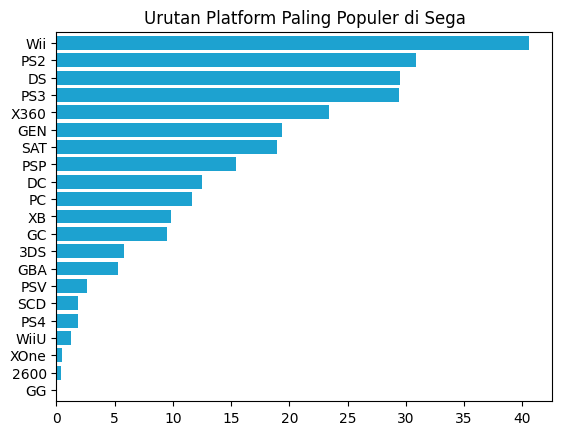

In [475]:
sega.groupby('Platform')['Global'].sum().sort_values().plot(kind='barh', width=0.8, color='#1da2d0')
plt.title('Urutan Platform Paling Populer di Sega')
plt.ylabel('');

## Preferensi platform dan genre game dari setiap region

### Preferensi Platform di Setiap Region

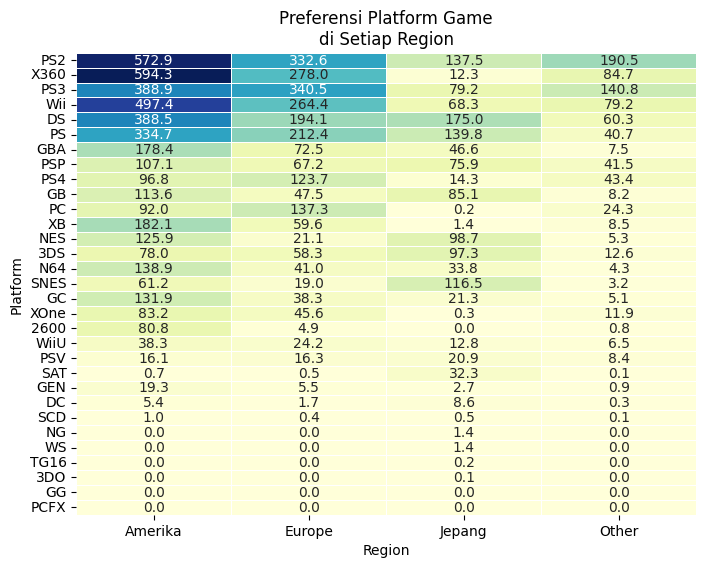

In [476]:
# Menghitung total penjualan per Platform untuk setiap wilayah
platform_pref = games.groupby('Platform')[['Amerika', 'Europe', 'Jepang', 'Other']].sum()

# Menambahkan total global sales ke dalam dataframe
platform_pref['Global'] = platform_pref.sum(axis=1)

# Mengurutkan berdasarkan penjualan global secara menurun
platform_pref = platform_pref.sort_values(by='Global', ascending=False)

platform_pref = platform_pref.drop('Global', axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(
    platform_pref,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar=False
)
plt.title('Preferensi Platform Game\ndi Setiap Region')
plt.ylabel('Platform')
plt.xlabel('Region')
plt.xticks()
plt.show()

### Preferensi Genre Game di Setiap Region

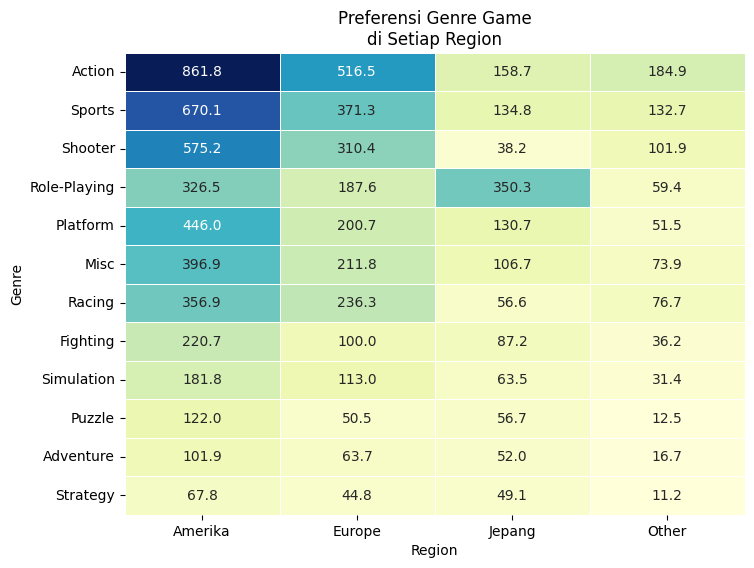

In [477]:
# Menghitung total penjualan per Platform untuk setiap wilayah
genre_pref = games.groupby('Genre')[['Amerika', 'Europe', 'Jepang', 'Other']].sum()

# Menambahkan total global sales ke dalam dataframe
genre_pref['Global'] = genre_pref.sum(axis=1)

# Mengurutkan berdasarkan penjualan global secara menurun
genre_pref = genre_pref.sort_values(by='Global', ascending=False)

genre_pref = genre_pref.drop('Global', axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(
    genre_pref,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar=False
)
plt.title('Preferensi Genre Game\ndi Setiap Region')
plt.ylabel('Genre')
plt.xlabel('Region')
plt.xticks()
plt.show()

# Dataset AMZ

In [478]:
amz.head()

,Invoice,SKU,Deskripsi,Qty,Invoice_Date,Price,Cust_ID,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [479]:
amz['Cust_ID'] = amz['Cust_ID'].astype('Int64')

In [480]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice       536641 non-null  object 
 1   SKU           536641 non-null  object 
 2   Deskripsi     535187 non-null  object 
 3   Qty           536641 non-null  int64  
 4   Invoice_Date  536641 non-null  object 
 5   Price         536641 non-null  float64
 6   Cust_ID       401604 non-null  Int64  
 7   Negara        536641 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 37.4+ MB


In [481]:
amz['Invoice_Date'] = pd.to_datetime(amz['Invoice_Date'], format="%d/%m/%Y %H:%M")

In [482]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       536641 non-null  object        
 1   SKU           536641 non-null  object        
 2   Deskripsi     535187 non-null  object        
 3   Qty           536641 non-null  int64         
 4   Invoice_Date  536641 non-null  datetime64[ns]
 5   Price         536641 non-null  float64       
 6   Cust_ID       401604 non-null  Int64         
 7   Negara        536641 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 37.4+ MB


In [483]:
amz['Quarter'] = amz['Invoice_Date'].dt.to_period('Q')
amz['Year'] = amz['Invoice_Date'].dt.year
amz['Month_Year'] = amz['Invoice_Date'].dt.to_period('M')

In [484]:
amz.head()

,Invoice,SKU,Deskripsi,Qty,Invoice_Date,Price,Cust_ID,Negara,Quarter,Year,Month_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010Q4,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010Q4,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010Q4,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010Q4,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010Q4,2010,2010-12


In [485]:
amz['Sales'] = amz['Qty'] * amz['Price']

In [486]:
amz.head()

,Invoice,SKU,Deskripsi,Qty,Invoice_Date,Price,Cust_ID,Negara,Quarter,Year,Month_Year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010Q4,2010,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010Q4,2010,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010Q4,2010,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010Q4,2010,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010Q4,2010,2010-12,20.34


## Bagaimana Tren Penjualan Per-Kuartal?

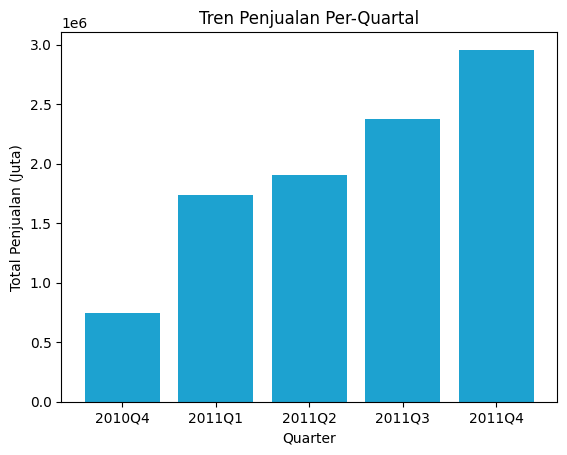

In [487]:
amz.groupby('Quarter')['Sales'].sum().plot(kind='bar', width=0.8, color='#1da2d0')
plt.title('Tren Penjualan Per-Quartal')
plt.ylabel('Total Penjualan (Juta)')
plt.xticks(rotation=0);

## Bagaimana Histori dan Proyeksi Penjualan pada Masing-masing Negara?

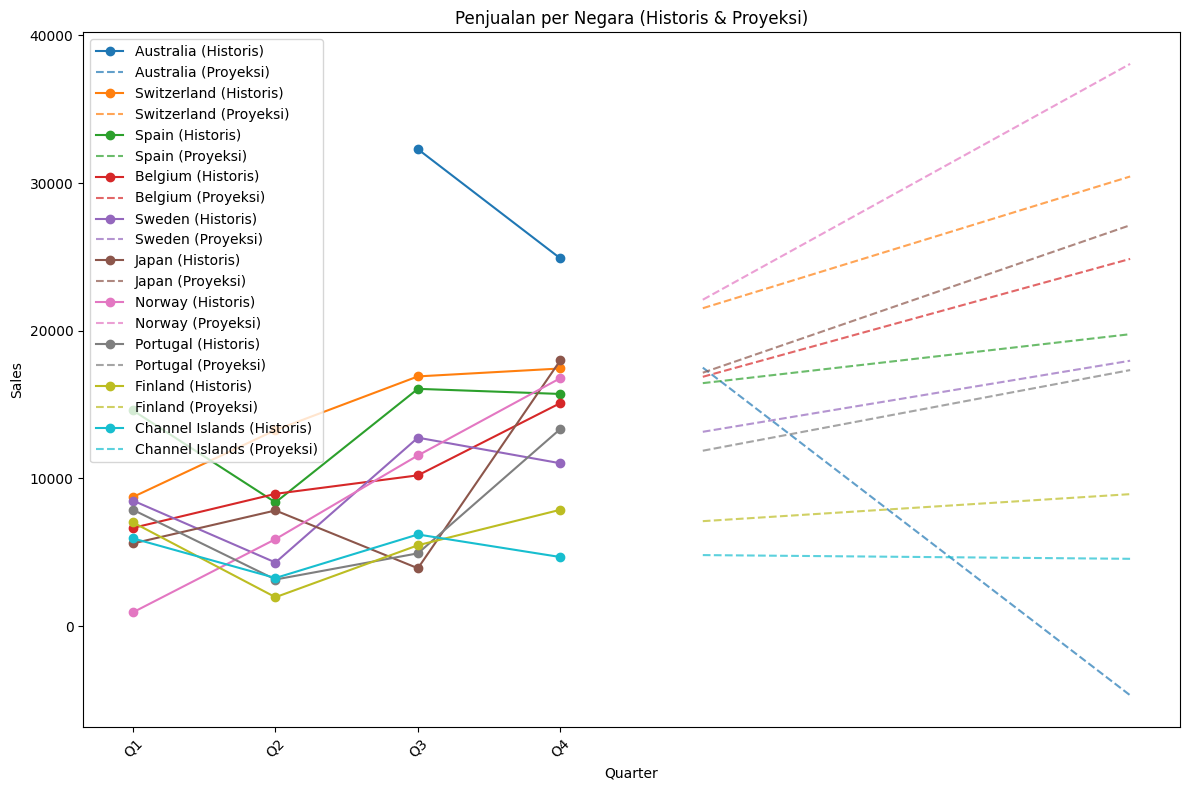

In [488]:
# Mengonversi Quarter ke angka untuk regresi menggunakan atribut `quarter`
amz['Quarter_Num'] = amz['Quarter'].dt.quarter

# Menghitung penjualan total per negara dan kuartal
negara_sales = amz.groupby(['Negara', 'Quarter_Num'])['Sales'].sum().reset_index()

# Menghitung IQR untuk deteksi outlier
Q1 = negara_sales['Sales'].quantile(0.25)
Q3 = negara_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
negara_sales_clean = negara_sales[(negara_sales['Sales'] >= (Q1 - 1.5 * IQR)) & (negara_sales['Sales'] <= (Q3 + 1.5 * IQR))]

# Menghitung total penjualan per negara
total_sales_per_negara = negara_sales_clean.groupby('Negara')['Sales'].sum().sort_values(ascending=False)

# Menampilkan 10 negara dengan penjualan terbesar (tanpa Australia)
top_10_negara = total_sales_per_negara[total_sales_per_negara.index].head(10)

# Proyeksi Penjualan per Negara untuk 1 Tahun ke Depan
future_quarters = np.array([5, 6, 7, 8]).reshape(-1, 1)  # Q2 2012, Q3 2012, Q4 2012, Q1 2013

# Menyaring data untuk 10 negara teratas
negara_sales_filtered = negara_sales_clean[negara_sales_clean['Negara'].isin(top_10_negara.index)]

# Proyeksi untuk setiap negara
projections = []
for negara in top_10_negara.index:
    negara_data = negara_sales_filtered[negara_sales_filtered['Negara'] == negara]
    model = LinearRegression()
    X = negara_data['Quarter_Num'].values.reshape(-1, 1)
    y = negara_data['Sales'].values
    model.fit(X, y)
    forecasted_sales = model.predict(future_quarters)
    
    projections.append({
        'Negara': negara,
        'Proyeksi Penjualan Q2 2012': forecasted_sales[0],
        'Proyeksi Penjualan Q3 2012': forecasted_sales[1],
        'Proyeksi Penjualan Q4 2012': forecasted_sales[2],
        'Proyeksi Penjualan Q1 2013': forecasted_sales[3]
    })

# Menampilkan hasil proyeksi
projection_df = pd.DataFrame(projections)

# Menentukan warna yang berbeda untuk setiap negara
colors = sns.color_palette("tab10", n_colors=len(top_10_negara.index))

# Visualisasi
plt.figure(figsize=(12, 8))

# Plot historis dan proyeksi dengan warna yang berbeda untuk setiap negara
for i, negara in enumerate(top_10_negara.index):
    negara_data = negara_sales_filtered[negara_sales_filtered['Negara'] == negara]
    plt.plot(negara_data['Quarter_Num'], negara_data['Sales'], marker='o', label=f'{negara} (Historis)', color=colors[i])
    
    # Proyeksi dengan garis putus-putus
    forecasted_sales = projection_df[projection_df['Negara'] == negara].iloc[0, 1:].values
    plt.plot([5, 6, 7, 8], forecasted_sales, '--', label=f'{negara} (Proyeksi)', color=colors[i], alpha=0.7)

# Menambahkan keterangan dan pengaturan sumbu
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'], rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Penjualan per Negara (Historis & Proyeksi)')
plt.legend()
plt.tight_layout()
plt.show()

## Siapa Saja Pelanggan dengan Total Belanja Tertinggi?

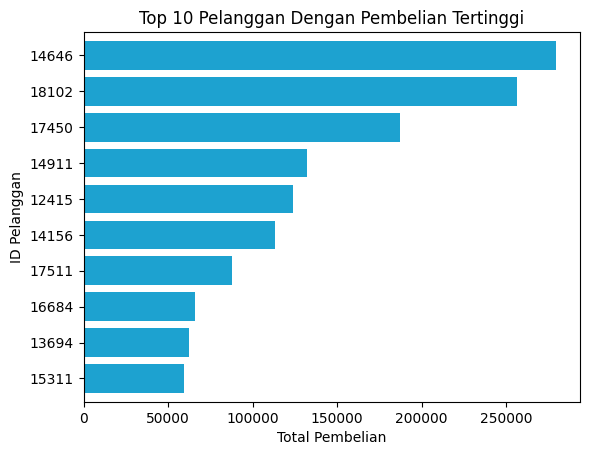

In [489]:
top_10_customers = amz.groupby('Cust_ID')['Sales'].sum().sort_values().tail(10)
top_10_customers.plot(kind='barh', width=0.8, color='#1da2d0')
plt.title('Top 10 Pelanggan Dengan Pembelian Tertinggi')
plt.ylabel('ID Pelanggan')
plt.xlabel('Total Pembelian');

## Bagaimana dengan Total Return yang Terjadi?

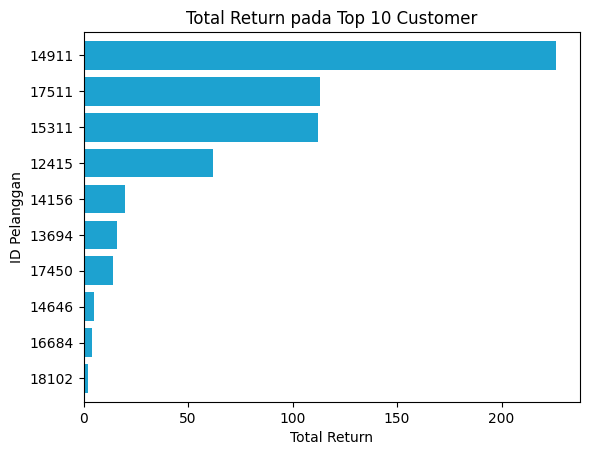

In [490]:
ret = amz[amz['Qty']<0]
ret[ret['Cust_ID'].isin(top_10_customers.index)].groupby('Cust_ID').size().sort_values().plot(kind='barh', width=0.8, color='#1da2d0')
plt.ylabel('ID Pelanggan')
plt.xlabel('Total Return')
plt.title('Total Return pada Top 10 Customer');

## Adakah Kesamaan Preferensi Produk pada Pelanggan Premium?

In [491]:
amz[amz['Cust_ID'].isin(top_10_customers.index)].groupby('Cust_ID')['Deskripsi'].describe()

,count,unique,top,freq
Cust_ID,,,,
12415,778,451,DOLLY GIRL LUNCH BOX,6
13694,584,370,JUMBO BAG APPLES,9
14156,1415,732,CARRIAGE,13
14646,2085,720,SPACEBOY LUNCH BOX,25
14911,5898,1823,CARRIAGE,85
15311,2478,580,EDWARDIAN PARASOL NATURAL,30
16684,281,122,GREEN REGENCY TEACUP AND SAUCER,8
17450,350,128,HEART OF WICKER LARGE,11
17511,1076,479,JUMBO BAG RED RETROSPOT,18


In [492]:
amz.isnull().sum()

Invoice              0
SKU                  0
Deskripsi         1454
Qty                  0
Invoice_Date         0
Price                0
Cust_ID         135037
Negara               0
Quarter              0
Year                 0
Month_Year           0
Sales                0
Quarter_Num          0
dtype: int64

## Segmentasi Pelanggan

In [493]:
latest_date = amz['Invoice_Date'].max()

recency = amz.groupby('Cust_ID').agg({'Invoice_Date': lambda x : (latest_date - x.max()).days}).reset_index() # calculating recency
recency.rename(columns= {'Invoice_Date':'Recency'}, inplace= True) # renaming columns

frequency = amz.groupby('Cust_ID').size().reset_index(name='Frequency') # calculating frequency

monetary = amz.groupby('Cust_ID').agg({'Sales':'sum'}).reset_index() # calculting monetary
monetary.rename(columns= {'Sales':'Monetary'}, inplace= True) # renaming columns

RFM = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
RFM

,Cust_ID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40
...,...,...,...,...
4367,18280,277,10,180.60
4368,18281,180,7,80.82
4369,18282,7,13,176.60
4370,18283,3,721,2045.53


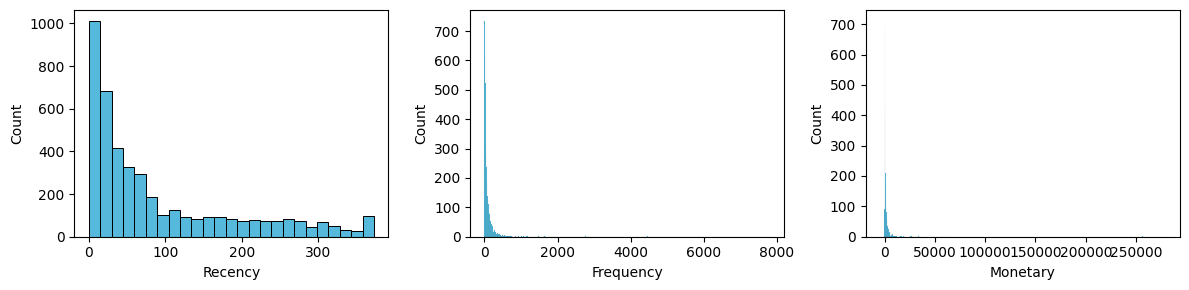

In [494]:
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.histplot(x= RFM[feature], ax= axis[i], color= '#1da2d0')

plt.tight_layout()
plt.show()

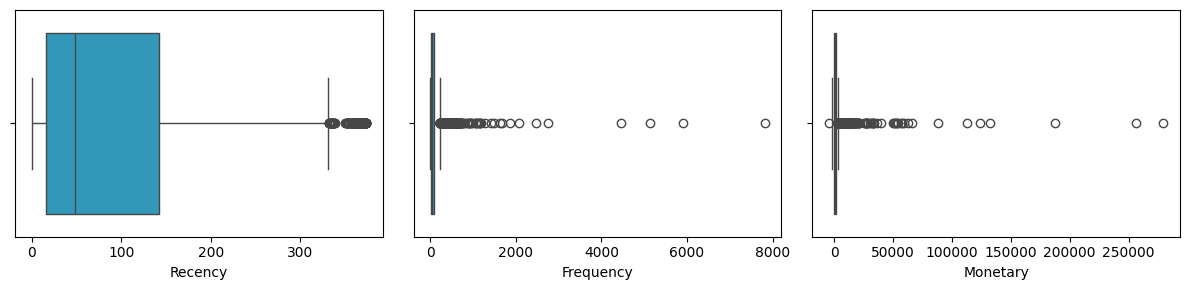

In [495]:
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(x= RFM[feature], ax= axis[i], color= '#1da2d0')

plt.tight_layout()
plt.show()

In [496]:
def remove_outliers(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Kuartil pertama
        Q3 = df[col].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang antar-kuartil
        
        # Batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Menghapus outlier
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

# Menghapus outlier pada kolom Recency, Frequency, dan Monetary
columns_to_clean = ['Recency', 'Frequency', 'Monetary']
rfm_cleaned = remove_outliers(RFM, columns_to_clean)

In [497]:
rfm_cleaned

,Cust_ID,Recency,Frequency,Monetary
0,12346,325,2,0.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40
5,12352,35,95,1545.41
...,...,...,...,...
4366,18278,73,9,173.90
4367,18280,277,10,180.60
4368,18281,180,7,80.82
4369,18282,7,13,176.60


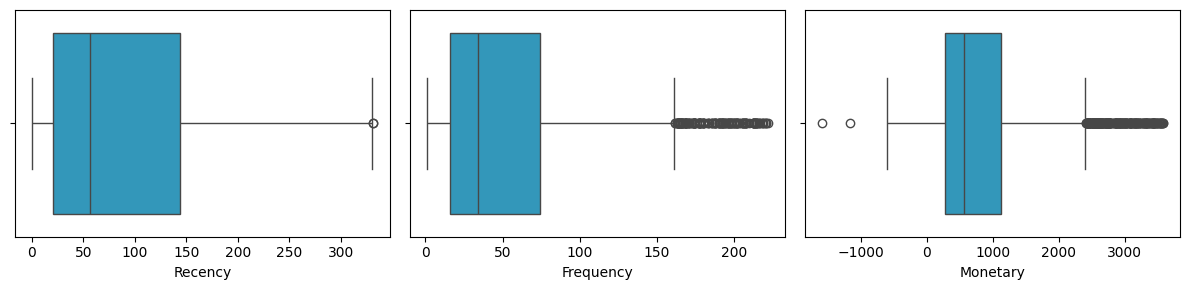

In [498]:
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(x= rfm_cleaned[feature], ax= axis[i], color= '#1da2d0')

plt.tight_layout()
plt.show()

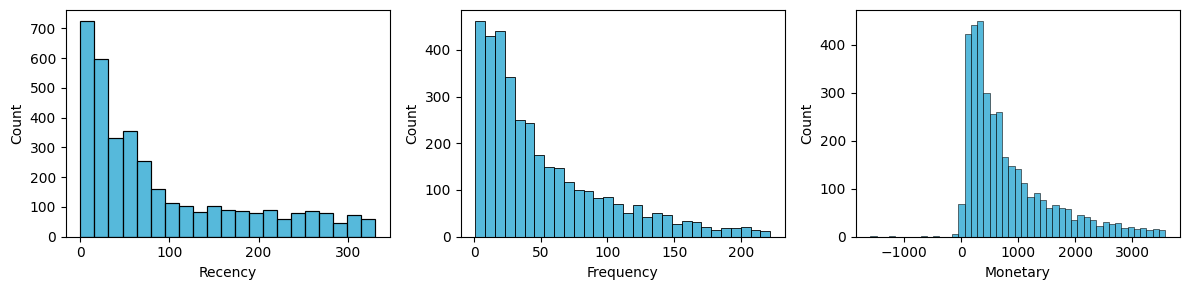

In [499]:
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.histplot(x= rfm_cleaned[feature], ax= axis[i], color= '#1da2d0')

plt.tight_layout()
plt.show()

In [500]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [501]:
sc = StandardScaler()
rfm_clean = rfm_cleaned.drop('Cust_ID', axis=1)
rfm_trans = sc.fit_transform(rfm_clean)
rfm_trans = pd.DataFrame(rfm_trans,columns=rfm_clean.columns)
rfm_trans.head()

,Recency,Frequency,Monetary
0,2.582708,-1.037336,-1.068189
1,-0.183951,-0.431133,1.263603
2,-0.801214,0.446815,1.212108
3,2.406347,-0.723783,-0.634329
4,-0.613831,0.906693,0.936871


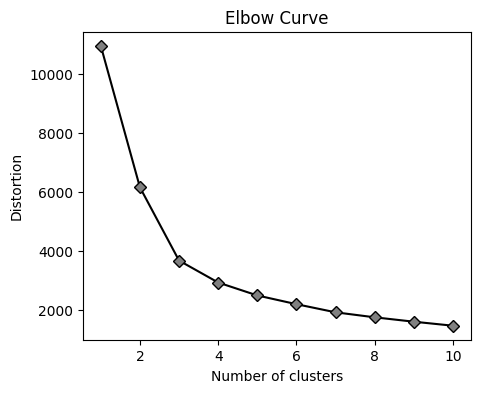

In [502]:
plt.figure(figsize=(5,4))
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(rfm_trans)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,color='black', marker='D', markerfacecolor='grey')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

In [503]:
km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)

In [504]:
clusters = km.fit(rfm_trans)
labels = km.labels_

In [505]:
rfm_clean['Clusters'] = labels

In [506]:
rfm_clean

,Recency,Frequency,Monetary,Clusters
0,325,2,0.00,1
2,74,31,1797.24,0
3,18,73,1757.55,2
4,309,17,334.40,1
5,35,95,1545.41,2
...,...,...,...,...
4366,73,9,173.90,0
4367,277,10,180.60,1
4368,180,7,80.82,1
4369,7,13,176.60,0


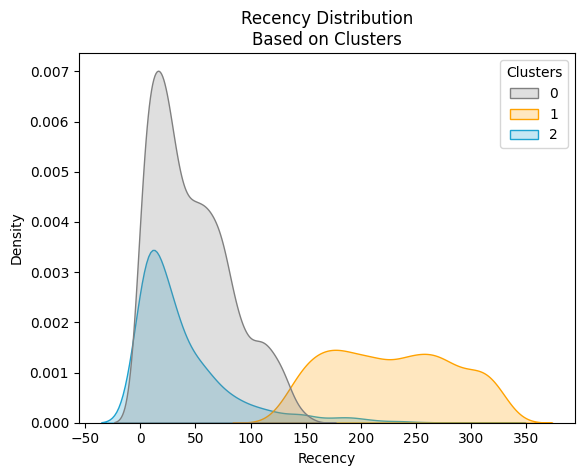

In [507]:
custom_palette = ['grey', '#FFA200', '#1da2d0']

# Membuat plot KDE dengan warna yang sudah ditentukan
sns.kdeplot(data=rfm_clean, x='Recency', hue='Clusters', palette=custom_palette, fill=True)

# Menambahkan judul
plt.title('Recency Distribution\nBased on Clusters')
plt.show()

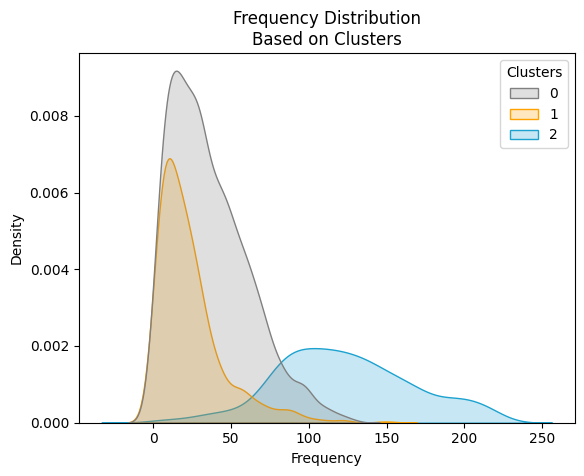

In [508]:
sns.kdeplot(data=rfm_clean, x='Frequency', hue='Clusters', palette=custom_palette, fill=True)
plt.title('Frequency Distribution\nBased on Clusters');

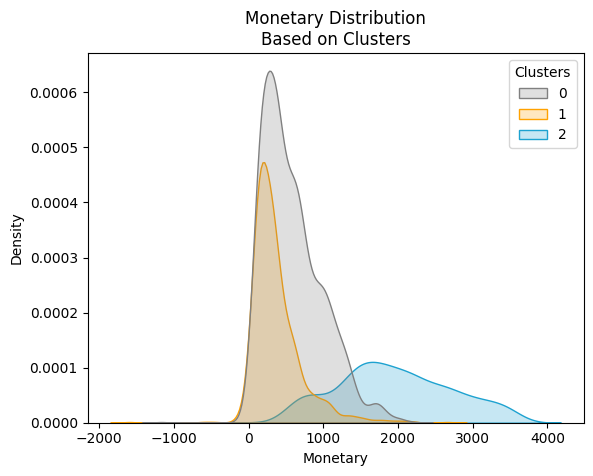

In [509]:
sns.kdeplot(data=rfm_clean, x='Monetary', hue='Clusters', palette=custom_palette, fill=True)
plt.title('Monetary Distribution\nBased on Clusters');

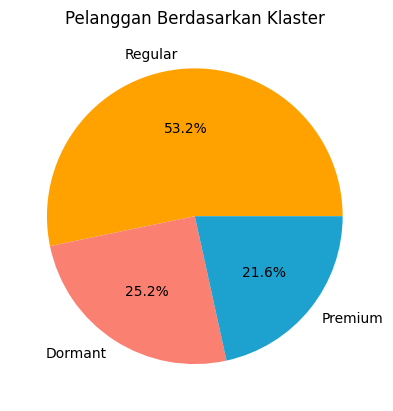

In [510]:
rfm_clean['Clusters'].value_counts().plot(kind='pie', colors=['#FFA200','salmon','#1da2d0'], labels = ['Regular', 'Dormant', 'Premium'], autopct=('%.1f%%'))
plt.title('Pelanggan Berdasarkan Klaster')
plt.ylabel('');

In [511]:
rfm_clean.groupby('Clusters').agg(['count', 'mean'])

Recency             Frequency             Monetary             
           count        mean     count        mean    count         mean
Clusters                                                                
0           1946   46.887975      1946   35.995889     1946   581.168506
1            921  227.919653       921   23.639522      921   372.259924
2            788   38.463198       788  122.930203      788  1948.477298

## Terima Kasih